In [2]:
%matplotlib notebook

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import json
from scipy import stats

# Store filepath in a variable
file = "Output_data/Happiness_df.csv"

In [4]:
original_df = pd.read_csv(file)
original_df

,Index,Country,Rank (2015),Happiness Score (2015),Family (2015),Health (2015),Freedom (2015),Perceptions of Corruption (2015),Generosity (2015),Rank (2016),...,Freedom (2019),Perceptions of Corruption (2019),Generosity (2019),Rank (2022),Happiness Score (2022),Family (2022),Health (2022),Freedom (2022),Perceptions of Corruption (2022),Generosity (2022)
0,0,Switzerland,1.0,7.587,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.572,0.343,0.263,4.0,7.512,1.226,0.822,0.677,0.461,0.147
1,1,Iceland,2.0,7.561,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.591,0.118,0.354,3.0,7.557,1.320,0.803,0.718,0.191,0.270
2,2,Denmark,3.0,7.527,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.592,0.410,0.252,2.0,7.636,1.243,0.777,0.719,0.532,0.188
3,3,Norway,4.0,7.522,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.603,0.341,0.271,8.0,7.365,1.239,0.786,0.728,0.474,0.217
4,4,Canada,5.0,7.427,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.584,0.308,0.285,15.0,7.025,1.188,0.783,0.659,0.368,0.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,132,Ivory Coast,151.0,3.655,0.77115,0.15185,0.46866,0.17922,0.20165,139.0,...,0.352,0.090,0.154,88.0,5.235,0.442,0.322,0.451,0.124,0.149
112,133,Burkina Faso,152.0,3.587,0.85188,0.27125,0.39493,0.12832,0.21747,145.0,...,0.255,0.113,0.177,113.0,4.670,0.565,0.320,0.382,0.126,0.186
113,134,Afghanistan,153.0,3.575,0.30285,0.30335,0.23414,0.09719,0.36510,154.0,...,0.000,0.025,0.158,146.0,2.404,0.000,0.289,0.000,0.005,0.089
114,136,Benin,155.0,3.340,0.35386,0.31910,0.48450,0.08010,0.18260,153.0,...,0.349,0.082,0.175,115.0,4.623,0.064,0.335,0.479,0.230,0.127


In [5]:
Happiness_Score_df = original_df[["Country", "Happiness Score (2015)", "Happiness Score (2016)",
                     "Happiness Score (2017)", "Happiness Score (2018)",
                     "Happiness Score (2019)"]]
Happiness_Score_df.head()

,Country,Happiness Score (2015),Happiness Score (2016),Happiness Score (2017),Happiness Score (2018),Happiness Score (2019)
0,Switzerland,7.587,7.509,7.494,7.487,7.480
1,Iceland,7.561,7.501,7.504,7.495,7.494
2,Denmark,7.527,7.526,7.522,7.555,7.600
3,Norway,7.522,7.498,7.537,7.594,7.554
4,Canada,7.427,7.404,7.316,7.328,7.278


In [6]:
Happiness_Year_Mean = Happiness_Score_df.mean()
Happiness_Year_Mean

C:\Users\Owner\AppData\Local\Temp\ipykernel_14572\3422408629.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Happiness_Year_Mean = Happiness_Score_df.mean()


Happiness Score (2015)    5.514328
Happiness Score (2016)    5.525414
Happiness Score (2017)    5.541164
Happiness Score (2018)    5.576888
Happiness Score (2019)    5.613086
dtype: float64

In [7]:
Happiness_Score_Flipped_df = Happiness_Score_df.set_index("Country").T
Happiness_Score_Flipped_df

Country,Switzerland,Iceland,Denmark,Norway,Canada,Finland,Netherlands,Sweden,New Zealand,Australia,...,Senegal,Gabon,Cambodia,Tanzania,Guinea,Ivory Coast,Burkina Faso,Afghanistan,Benin,Togo
Happiness Score (2015),7.587,7.561,7.527,7.522,7.427,7.406,7.378,7.364,7.286,7.284,...,3.904,3.896,3.819,3.781,3.656,3.655,3.587,3.575,3.340,2.839
Happiness Score (2016),7.509,7.501,7.526,7.498,7.404,7.413,7.339,7.291,7.334,7.313,...,4.219,4.121,3.907,3.666,3.607,3.916,3.739,3.360,3.484,3.303
Happiness Score (2017),7.494,7.504,7.522,7.537,7.316,7.469,7.377,7.284,7.314,7.284,...,4.535,4.465,4.168,3.349,3.507,4.180,4.032,3.794,3.657,3.495
Happiness Score (2018),7.487,7.495,7.555,7.594,7.328,7.632,7.441,7.314,7.324,7.272,...,4.631,4.758,4.433,3.303,3.964,4.671,4.424,3.632,4.141,3.999
Happiness Score (2019),7.480,7.494,7.600,7.554,7.278,7.769,7.488,7.343,7.307,7.228,...,4.681,4.799,4.700,3.231,4.534,4.944,4.587,3.203,4.883,4.085


In [8]:
Happiness_Score_mean = Happiness_Score_Flipped_df.mean()
Happiness_Score_mean

Country
Switzerland     7.5114
Iceland         7.5110
Denmark         7.5460
Norway          7.5410
Canada          7.3506
                 ...  
Ivory Coast     4.2732
Burkina Faso    4.0738
Afghanistan     3.5128
Benin           3.9010
Togo            3.5442
Length: 116, dtype: float64

In [9]:
h_fifteen_sum = Happiness_Score_df["Happiness Score (2015)"].sum()
h_sixteen_sum = Happiness_Score_df["Happiness Score (2016)"].sum()
h_seventeen_sum = Happiness_Score_df["Happiness Score (2017)"].sum()
h_eighteen_sum = Happiness_Score_df["Happiness Score (2018)"].sum()
h_nineteen_sum = Happiness_Score_df["Happiness Score (2019)"].sum()
h_count = Happiness_Score_df["Country"].count()
h_total_mean = (h_fifteen_sum+h_sixteen_sum+h_seventeen_sum+h_eighteen_sum+h_nineteen_sum)/(h_count*5)
h_total_mean

5.554175861411259

In [10]:
Family_df = original_df[["""Country", "Family (2015)", "Family (2016)",
                     "Family (2017)", "Family (2018)",
                     "Family (2019)"]]
Family_df.head()

,Country,Family (2015),Family (2016),Family (2017),Family (2018),Family (2019)
0,Switzerland,1.34951,1.14524,1.516912,1.549,1.526
1,Iceland,1.40223,1.18326,1.610574,1.644,1.624
2,Denmark,1.36058,1.16374,1.551122,1.590,1.573
3,Norway,1.33095,1.12690,1.533524,1.582,1.582
4,Canada,1.32261,1.09610,1.481349,1.532,1.505


In [11]:
year_mean = Family_df.mean()
year_mean

C:\Users\Owner\AppData\Local\Temp\ipykernel_14572\3062863003.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  year_mean = Family_df.mean()


Family (2015)    1.016806
Family (2016)    0.819735
Family (2017)    1.226296
Family (2018)    1.258879
Family (2019)    1.258879
dtype: float64

In [12]:
Family_Flipped_df = Family_df.set_index("Country").T
Family_Flipped_df

Country,Switzerland,Iceland,Denmark,Norway,Canada,Finland,Netherlands,Sweden,New Zealand,Australia,...,Senegal,Gabon,Cambodia,Tanzania,Guinea,Ivory Coast,Burkina Faso,Afghanistan,Benin,Togo
Family (2015),1.349510,1.402230,1.360580,1.330950,1.322610,1.318260,1.280170,1.289070,1.319670,1.309230,...,0.976190,0.90528,0.627360,1.00268,0.464750,0.77115,0.85188,0.302850,0.35386,0.139950
Family (2016),1.145240,1.183260,1.163740,1.126900,1.096100,1.134640,1.029120,1.087640,1.172780,1.104760,...,0.774160,0.72368,0.537500,0.77623,0.310900,0.57576,0.63054,0.110370,0.10419,0.000000
Family (2017),1.516912,1.610574,1.551122,1.533524,1.481349,1.540247,1.428939,1.478162,1.548195,1.510042,...,1.179692,1.15562,1.006238,1.04199,0.791245,0.90478,1.04328,0.581543,0.43530,0.431883
Family (2018),1.549000,1.644000,1.590000,1.582000,1.532000,1.592000,1.488000,1.501000,1.601000,1.573000,...,1.117000,1.16400,1.088000,0.99100,0.792000,0.87200,1.09700,0.537000,0.37200,0.474000
Family (2019),1.526000,1.624000,1.573000,1.582000,1.505000,1.587000,1.522000,1.487000,1.557000,1.548000,...,1.134000,1.18300,1.122000,0.88500,0.829000,0.80800,1.05600,0.517000,0.43700,0.572000


In [13]:
f_fifteen_sum = Family_df["Family (2015)"].sum()
f_sixteen_sum = Family_df["Family (2016)"].sum()
f_seventeen_sum = Family_df["Family (2017)"].sum()
f_eighteen_sum = Family_df["Family (2018)"].sum()
f_nineteen_sum = Family_df["Family (2019)"].sum()
f_count = Family_df["Country"].count()
f_total_mean = (f_fifteen_sum+f_sixteen_sum+f_seventeen_sum+f_eighteen_sum+f_nineteen_sum)/(f_count*5)
f_total_mean

1.1161192752337292

In [15]:
country_name = Family_df["Country"].unique()
country_mean = Family_Flipped_df.mean()
country_mean_df = pd.DataFrame({"Family Mean": country_mean,
                                "Happiness Score Mean": Happiness_Score_mean})
country_mean_df = country_mean_df.sort_values("Family Mean", ascending=False)
country_mean_df.head(5)

,Family Mean,Happiness Score Mean
Country,,
Iceland,1.492813,7.5110
Denmark,1.447688,7.5460
Ireland,1.445056,6.9644
New Zealand,1.439729,7.3130
Finland,1.434429,7.5378


In [17]:
def linear_regrression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is: {rvalue**2}")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    return line_eq

<IPython.core.display.Javascript object>


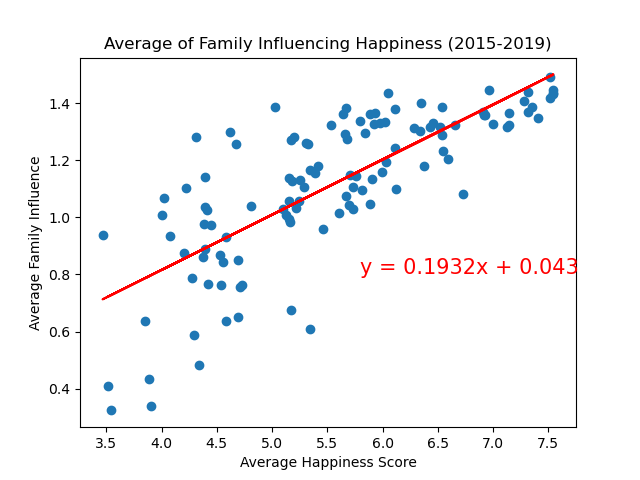

The r-value is: 0.5852636004828339


In [23]:
avg_country_plot = linear_regrression(country_mean_df["Happiness Score Mean"], country_mean_df["Family Mean"])
plt.title("Average of Family Influencing Happiness (2015-2019)")
plt.xlabel("Average Happiness Score")
plt.ylabel("Average Family Influence")
plt.savefig("Figure_File/Family_2015-19.png")
plt.show()

In [24]:
latest_df = original_df[["Country", "Family (2022)", "Happiness Score (2022)"]]
latest_df = latest_df.sort_values("Family (2022)", ascending=False)
latest_df.head(5)

,Country,Family (2022),Happiness Score (2022)
1,Iceland,1.320,7.557
5,Finland,1.258,7.821
44,Slovenia,1.249,6.630
2,Denmark,1.243,7.636
3,Norway,1.239,7.365


In [25]:
latest_df.mean()

C:\Users\Owner\AppData\Local\Temp\ipykernel_16020\4106272869.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  latest_df.mean()


Family (2022)             0.924259
Happiness Score (2022)    5.667784
dtype: float64

<IPython.core.display.Javascript object>


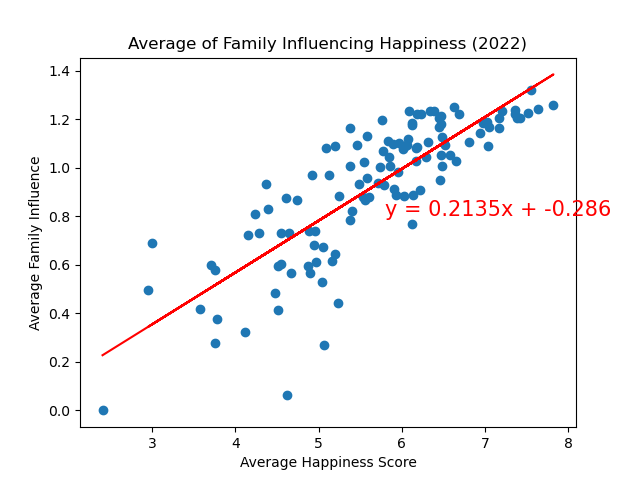

The r-value is: 0.6725286030848764


In [26]:
latest_country_plot = linear_regrression(latest_df["Happiness Score (2022)"],
                                      latest_df["Family (2022)"])
plt.title("Average of Family Influencing Happiness (2022)")
plt.xlabel("Average Happiness Score")
plt.ylabel("Average Family Influence")
plt.savefig("Figure_File/Family_2022.png")
plt.show()